In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

Using TensorFlow backend.
/home/hitsuji/anaconda3/envs/audio/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/hitsuji/anaconda3/envs/audio/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/hitsuji/anaconda3/envs/audio/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/hitsuji/anacon

In [11]:
pathx = 'data'
genres = ['cough', 'bad_cough']

KeyboardInterrupt: 

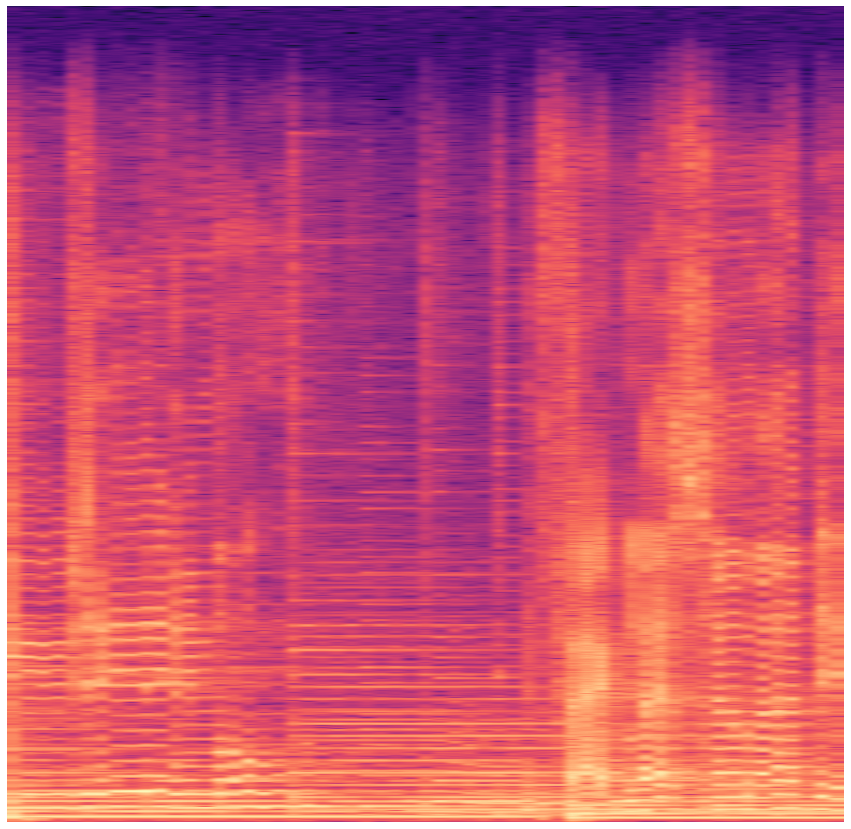

In [6]:
cmap = plt.get_cmap('magma')

plt.figure(figsize=(15,15))
for g in genres:
    pathlib.Path(f'img_spectre/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./{pathx}/{g}'):
        songname = f'./{pathx}/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=1)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_spectre/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()
 

In [7]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [12]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

for g in genres:
    for filename in os.listdir(f'./{pathx}/{g}'):
        songname = f'./{pathx}/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [15]:
data = pd.read_csv('data.csv')
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.306928,0.103914,2595.538006,2519.296119,5660.407439,0.129246,-118.665237,87.600960,6.563414,45.094280,...,3.978413,-27.542307,3.050489,-15.946974,10.868560,-12.646966,2.820748,-13.337095,-4.375538,blues
1,0.424284,0.175920,1886.683619,1913.224623,3828.101852,0.089924,-92.747978,115.339531,-35.064270,57.861553,...,7.277173,-10.205973,1.332175,-4.105897,0.978303,-6.553787,-0.682512,-2.126827,-1.518243,blues
2,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334000,-46.809990,40.932632,...,14.336612,-13.821767,7.562788,-6.181373,0.330166,-6.829571,0.965922,-7.570825,2.918987,blues
3,0.369972,0.187148,1388.394749,1772.854380,2754.525010,0.057147,-130.553955,139.977097,-1.269147,39.323650,...,1.611757,-6.628306,4.952240,-1.633327,0.956660,-4.840757,-5.966955,-2.782187,-6.494001,blues
4,0.263016,0.170081,1379.081742,2004.000850,3015.831764,0.039376,-206.987595,117.781471,23.256245,28.294065,...,-8.015468,-17.616341,-8.138554,-8.646156,-15.538987,-15.331505,-9.664871,-10.103310,-17.835100,blues


In [16]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

182

In [24]:
from keras import models
from keras import layers

In [25]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)
                   


Epoch 1/20
728/728 [==============================] - 1s 997us/step - loss: 2.2289 - accuracy: 0.1635
Epoch 2/20
728/728 [==============================] - 0s 27us/step - loss: 1.9353 - accuracy: 0.3310
Epoch 3/20
728/728 [==============================] - 0s 37us/step - loss: 1.7370 - accuracy: 0.3695
Epoch 4/20
728/728 [==============================] - 0s 33us/step - loss: 1.5694 - accuracy: 0.4533
Epoch 5/20
728/728 [==============================] - 0s 38us/step - loss: 1.4173 - accuracy: 0.5179
Epoch 6/20
728/728 [==============================] - 0s 44us/step - loss: 1.2875 - accuracy: 0.5563
Epoch 7/20
728/728 [==============================] - 0s 23us/step - loss: 1.1900 - accuracy: 0.5907
Epoch 8/20
728/728 [==============================] - 0s 25us/step - loss: 1.1094 - accuracy: 0.6003
Epoch 9/20
728/728 [==============================] - 0s 40us/step - loss: 1.0328 - accuracy: 0.6401
Epoch 10/20
728/728 [==============================] - 0s 34us/step - loss: 0.9669 - accu

In [29]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

182/182 [==============================] - 0s 71us/step
test_acc:  0.6098901033401489


In [30]:
predictions = model.predict(X_test)

In [33]:
np.argmax(predictions[5])

7